# Обработка лабораторной работы 4.1

In [1]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

## Счетчик Гейгера

In [87]:
data1 = pd.read_excel('data/geiger.xlsx')

In [88]:
data1.head()

,x,s_x,N,s_n,t,N/t,s_n/t
0,60,0.5,101,10.049876,633.0,0.159558,0.015877
1,55,0.5,100,10.000000,744.0,0.134409,0.013441
2,50,0.5,101,10.049876,806.0,0.125310,0.012469
3,45,0.5,102,10.099505,700.0,0.145714,0.014428
4,40,0.5,110,10.488088,695.0,0.158273,0.015091


In [89]:
def draw(df):
    x = df['x']
    x_err = df['s_x']
    y = df['N/t']
    y_err = df['s_n/t']
    
    plt.figure(figsize=(15,10))
    plt.title('Зависимость N(x) (в ед. времени)'.decode('utf-8'))
    plt.xlabel('x, мм'.decode('utf-8'))
    plt.ylabel('N/t, шт/с'.decode('utf-8'))
    plt.errorbar(x = x, y = y, yerr = y_err, xerr = x_err, ecolor = 'black', label = 'Экспериментальные точки'.decode('utf-8'))
    plt.legend()
    plt.grid()

In [90]:
def sigmoida(x, a, b, x0, c):
    return a/(np.exp(b*(x-x0)) + 1) + c
def sigmoida_diff(x, a, b, x0, c):
    return a*b*np.exp(b*(x-x0))/(np.exp(b*(x-x0)) + 1)**2+c

In [91]:
popt1, pcov1 = curve_fit(f = sigmoida, xdata = data1['x'], ydata = data1['N/t'], maxfev=10000, p0 = [15.4,2.5,7.8,0.3])
print np.sqrt(np.diag(pcov1))
print popt1

[ 0.113727    0.15188757  0.02415563  0.07068965]
[ 15.02172293   2.47529783  17.9141455    0.19454291]


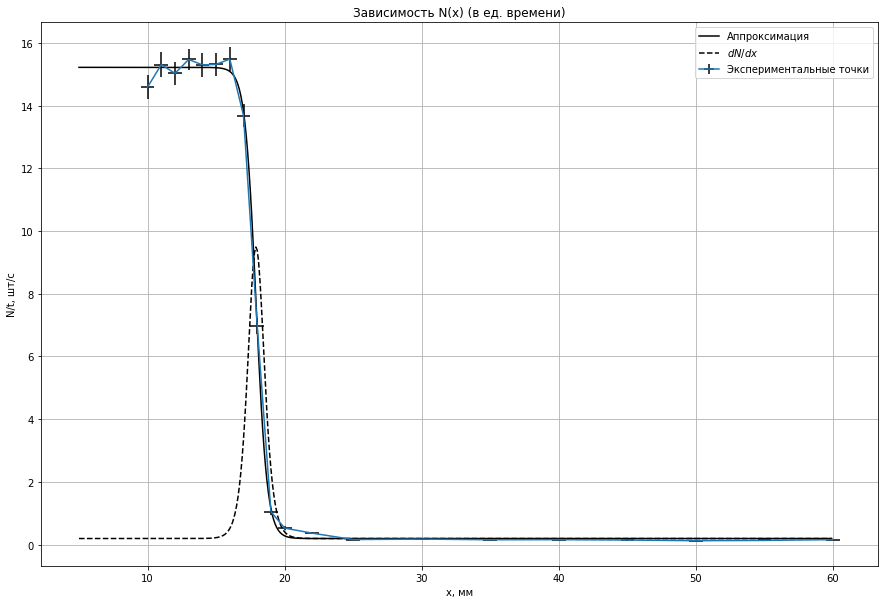

In [93]:
draw(data1)
plt.plot(np.arange(5, 60, 0.1), sigmoida(np.arange(5, 60, 0.1), *popt1), color = 'black', label = 'Аппроксимация'.decode('utf-8'))
plt.plot(np.arange(5, 60, 0.1), sigmoida_diff(np.arange(5, 60, 0.1), *popt1), color = 'black', linestyle='dashed', label = '$dN/dx$')
plt.legend()
plt.show()

In [95]:
from IPython.display import HTML
HTML('<iframe src=./N(x).pdf width=900 height=800></iframe>')

Таким образом
$$
R_{\text{ср}} = 1.791\pm0.002 \text{ см}\\
R_{\text{э}} = 1.91\pm1.88 \text{ см}
$$
или
$$
R'_{\text{ср}} = (2.194\pm0.003)\cdot10^{-3}\ \frac{\text{г}}{\text{cм$^2$}}\\
R'_{\text{э}} = (2.34\pm2.30)\cdot10^{-3} \ \frac{\text{г}}{\text{см$^2$}}.
$$
Отсюда
$$
E_{\text{ср}} = 3.152\pm0.002 \text{ МэВ}\\
E_{\text{э}} = 4\pm2 \text{ МэВ}
$$

## Ионизационная камера

In [83]:
HTML('<iframe src=./I(P).pdf width=900 height=800></iframe>')

Таким образом, с помощью МНК находим точку перечения
$$
P = (5.80\pm0.10) \cdot 10^2 \text{ торр}\\
I = (8.99\pm0.14)\cdot 10^2 \text{ пА}.
$$
По уравнению Клапейрона-Менделеева и т.к. $R = 5$ см (параметр установки)
$$
PR \propto T,
$$
то
$$
R_0 = \frac{T_0}{T}\,\frac{P}{P_0}\,R = 3.66\pm0.06 \text{ см}\\
R_0' = (4.48\pm0.07)\cdot10^{-3} \ \frac{\text{г}}{\text{см$^2$}}\\
E = 5.07\pm0.05 \text{ МэВ}
$$

## Сцинтилляционный счетчик

In [86]:
HTML('<iframe src=./N(P)_2.pdf width=900 height=800></iframe>')

Из МНК найдем точку перечения с осью Y
$$
P = (3.16\pm0.10)\cdot10^2\text{ торр}
$$
$$
R = 9 \text{ см}\\
R_0 = \frac{T_0}{T}\,\frac{P}{P_0}\,R = 3.59\pm0.11 \text{ см}\\
R_0' = (4.40\pm0.14)\cdot10^{-3} \ \frac{\text{г}}{\text{см$^2$}}\\
E = 5.73\pm0.09 \text{ МэВ}
$$

Определим толщину слоя слюды из уравнения:
$$
x/1.2+2.194\cdot10^{-3}=4.4*10^{-3} \Rightarrow x = 2.6\cdot10^{-3} \ \frac{\text{г}}{\text{см$^2$}} \Rightarrow L_{\text{сл}} = 9.8\cdot10^{-4} \text{ см} = 9.8 \text{ мкм}
$$